## Introduction Excess Mortality Using Germany as Example

We want to introduce the excess mortality statistics as a measure to estimate the severity of the COVID-19 pandemic in a given country or region. For this introduction we are going to use the data of Germany as example. The goal is to plot the expected mortality, the true mortality and the excess mortality as P-score over the course of the pandemic.

In [1]:
# Make inline plots vector graphics
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

# Plotting setup
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import pandas as pd
from tueplots import bundles

# Set Pyplot parameters to Neurips template
plt.rcParams.update(bundles.neurips2021(usetex=False))

We start by downloading the excess mortality data set from [OurWorldInData.org](https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality).

In [2]:
# Link to world-wide excess mortality data during the COVID pandemic
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/excess_mortality/excess_mortality.csv"

# Read CSV data from URL
data_owid = pd.read_csv(url)

# Parse data
data_owid["date"] = pd.to_datetime(data_owid.date, format="%Y-%m-%d")

# Inspect dataframe and datatypes
display(data_owid.head())
data_owid.dtypes[0:5]

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,p_proj_all_ages,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,cum_excess_per_million_proj_all_ages,excess_per_million_proj_all_ages,deaths_2022_all_ages,deaths_2020_2022_all_ages
0,Albania,2020-01-31,-10.65,NaN,NaN,NaN,NaN,2187.0,2447.8,2490.0,...,-10.16,NaN,NaN,NaN,NaN,NaN,-86.044441,-86.044441,NaN,2187.0
1,Albania,2020-02-29,2.17,NaN,NaN,NaN,NaN,2018.0,1975.2,2139.0,...,2.88,NaN,NaN,NaN,NaN,NaN,-66.412942,19.631499,NaN,2018.0
2,Albania,2020-03-31,0.62,NaN,NaN,NaN,NaN,1993.0,1980.8,2051.0,...,1.31,NaN,NaN,NaN,NaN,NaN,-57.432576,8.980366,NaN,1993.0
3,Albania,2020-04-30,3.23,NaN,NaN,NaN,NaN,1804.0,1747.6,1906.0,...,4.04,NaN,NaN,NaN,NaN,NaN,-33.067241,24.365335,NaN,1804.0
4,Albania,2020-05-31,6.15,NaN,NaN,NaN,NaN,1803.0,1698.6,1709.0,...,7.00,NaN,NaN,NaN,NaN,NaN,8.005753,41.072994,NaN,1803.0


location                     object
date                 datetime64[ns]
p_scores_all_ages           float64
p_scores_15_64              float64
p_scores_65_74              float64
dtype: object

Next, we extract the relevant columns and limit the data to Germany.

Relevant columns:
- deaths_2020_2022_all_ages: reported number of weekly deaths from all causes for all ages in 2020–2022
- projected_deaths_2020_2022_all_ages: projected number of weekly or monthly deaths from all causes for all ages for 2020–2022
- p_proj_all_ages: P-scores using projected baseline for all ages

If we have more time, we might do the same for cumulative data to show the aggregated impact over time.

In [3]:
# Remove columns, that are not needed
newcols = [
    "location",
    "date",
    "deaths_2020_2022_all_ages",
    "projected_deaths_2020_2022_all_ages",
    "p_proj_all_ages"
]
data_owid.drop(columns=data_owid.columns.difference(newcols), inplace=True)

data_germany = data_owid[data_owid.location=="Germany"].drop(columns=["location"])

data_germany.head()

,date,projected_deaths_2020_2022_all_ages,p_proj_all_ages,deaths_2020_2022_all_ages
2453,2020-01-05,19643.7,-3.87,18883.0
2454,2020-01-12,19964.9,-2.79,19408.0
2455,2020-01-19,19961.1,-5.05,18953.0
2456,2020-01-26,20180.9,-6.71,18827.0
2457,2020-02-02,20862.3,-5.22,19774.0


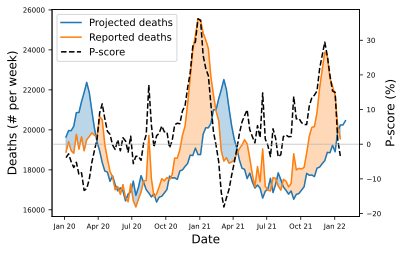

In [4]:
import matplotlib.dates as mdates

# create figure and axis
fig, ax = plt.subplots()

# create twin y-axis for P-score
ax2 = ax.twinx()

# make plots of deaths and projected deaths
ln1 = ax.plot(data_germany.date, data_germany.projected_deaths_2020_2022_all_ages, label="Projected deaths")
ln2 = ax.plot(data_germany.date, data_germany.deaths_2020_2022_all_ages, label="Reported deaths")

# shade region between projected and reported deaths
ax.fill_between(data_germany.date, data_germany.projected_deaths_2020_2022_all_ages, data_germany.deaths_2020_2022_all_ages, 
                where=(data_germany.projected_deaths_2020_2022_all_ages > data_germany.deaths_2020_2022_all_ages), color='C0', 
                alpha=0.3, interpolate=True)
ax.fill_between(data_germany.date, data_germany.projected_deaths_2020_2022_all_ages, data_germany.deaths_2020_2022_all_ages, 
                where=(data_germany.projected_deaths_2020_2022_all_ages < data_germany.deaths_2020_2022_all_ages), color='C1', 
                alpha=0.3, interpolate=True)

# set x-axis for dates
ax.set_xlabel("Date", fontsize=12)

# set y-axis for count of (excess) deaths
ax.set_ylabel("Deaths (# per week)", fontsize=12)

# plot P-score
ln3 = ax2.plot(data_germany.date, data_germany.p_proj_all_ages, linestyle='--', c="k", label="P-score")
ax2.set_ylabel("P-score (%)", fontsize=12)

# Get 0 line for P-Score
ax2.axhline(y=0, color="#b0b0b0", linewidth=0.8, alpha=0.8)

# Format Dates on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

# Add combined legend
lines = ln1 + ln2 + ln3
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc="upper left", prop={'size': 10})

# Save and show figure
plt.savefig("fig_em_intro.pdf", bbox_inches="tight")
plt.show()

### Possible next steps:
Add cumulative P-score on the right side as second subplot.